<a href="https://colab.research.google.com/github/jongwoo1126/Colab/blob/master/Ch03.%20%EB%94%A5%EB%9F%AC%EB%8B%9D%20%EC%8B%A4%EC%8A%B5/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Fashion MNIST 딥러닝 실습
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
tf.__version__

'2.8.0'

In [ ]:
# 데이터 불러오기
(train_data, train_label), (test_data, test_label) = load_data()

In [ ]:
#데이터 구조 확인
print(train_data.shape)
print(test_data.shape)
print(train_label[0])
print(train_label[1])

(60000, 28, 28)
(10000, 28, 28)
9
0


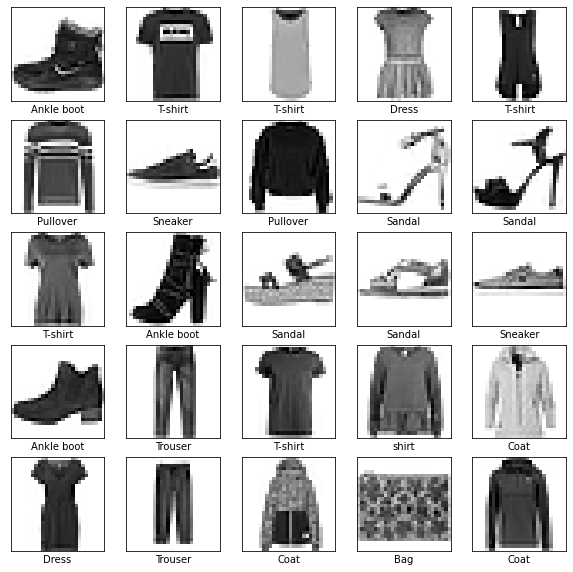

In [ ]:
# 데이터 시각화
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_data[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_label[i]])

plt.show()

In [ ]:
# 학습 데이터
_train_data = train_data / 255.0
_test_data = test_data / 255.0

In [ ]:
# 라벨 원-핫 인코딩
_train_label = to_categorical(train_label)
_test_label = to_categorical(test_label)

In [ ]:
# 학습모델 설계
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 64)                50240     
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 학습모델 설정
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

In [ ]:
# 학습하기
model.fit(_train_data, _train_label, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5163 - acc: 0.8183
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3850 - acc: 0.8605
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3472 - acc: 0.8724
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3259 - acc: 0.8795
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3074 - acc: 0.8861
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2929 - acc: 0.8904
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2832 - acc: 0.8949
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2724 - acc: 0.8982
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2636 - acc: 0.9011
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2565 - acc: 0.9044


In [ ]:
# 모델 평가하기
loss, accuracy = model.evaluate(_test_data,  _test_label)

print('accuracy:', accuracy)
print('loss:', loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.3478 - acc: 0.8754
accuracy: 0.8754000067710876
loss: 0.3478236496448517
